# Laboratorio 1 - parte 1

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns



# Análisis exploratorio de datos (EDA)

en esta secion se cargan los datos y se hace el reconomiciemto de los tipos de datos, como se distribuyen, que errores hay, etc. Y asi poder ajustarlo en base a las necesidades de los diferentes modelos y la prediccion que se quiera ejecutar

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

print( df_train.shape )
display(df_train.head())
print( df_test.shape )
display(df_test.head())



(750000, 9)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


(250000, 8)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [3]:
# Dado que el dataset de test no tiene la columna target (calories), no se puede usar para entrenar el modelo, por lo que solo se usará el de train

df=df_train
print(df.info()) # Con este proceso se puede ver la clasificacion de las variables y si hay datos nulos
print(df.isna().sum())
print(df['Sex'].value_counts()) #para confirmar que solo hayan dos categorias (male, female)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
None
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64
Sex
female    375721
male      374279
Name: count, dtype: int64


In [4]:
df.drop(columns=['id'], inplace=True) # Se elimina la columna id ya que no aporta nada al modelo
display(df.describe()) # Con este proceso se puede ver la distribucion de los datos, con estos datos se puede ver si hay datos atipicos o si hay que hacer algun ajuste en los datos

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Figure size 1000x600 with 0 Axes>

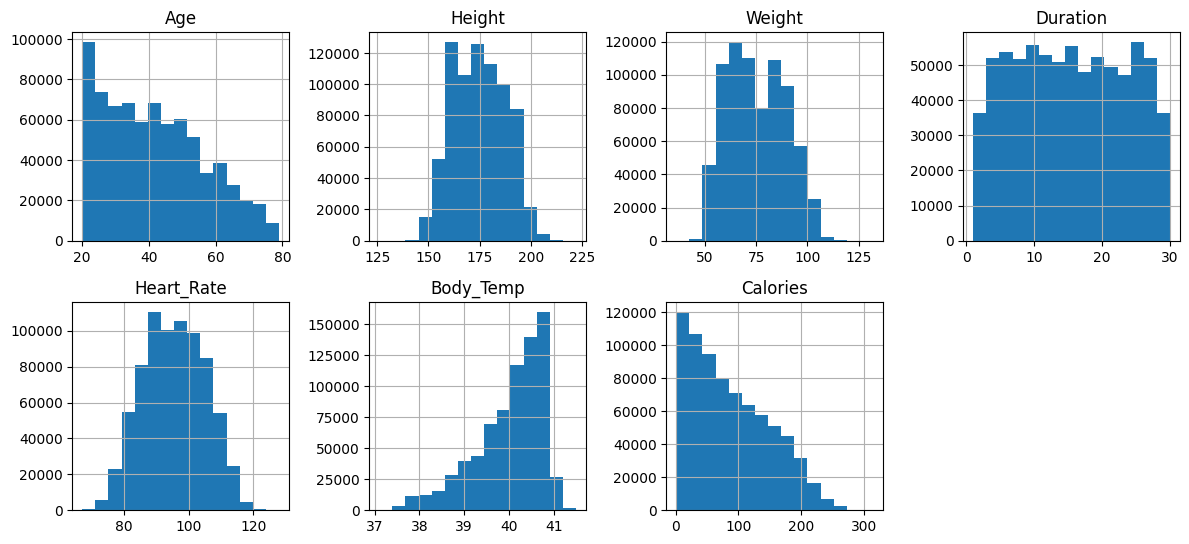

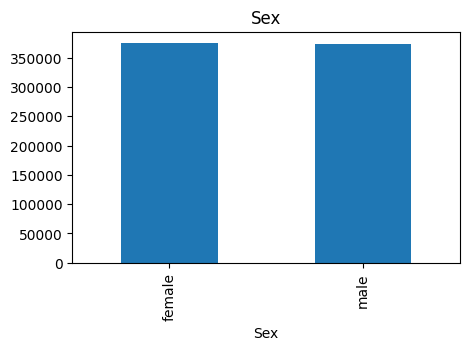

In [5]:

num_cols = df.select_dtypes(include=["number"]).columns.tolist() # se dividen las columnas en numericas y categoricas
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

plt.figure(figsize=(10,6)) #hitogramas de las variables numericas
df[num_cols].hist(bins=15, layout=(3,4), figsize=(12,8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3)) # graficas de barras de las variables categoricas
for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

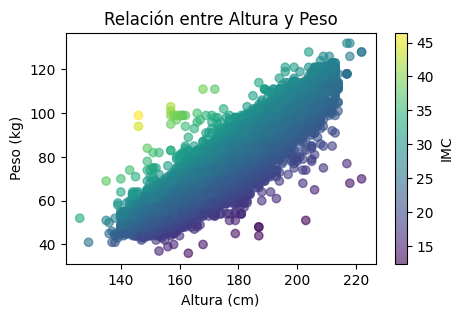

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(
    df["Height"], 
    df["Weight"], 
    c=df["Weight"] / ((df["Height"]/100)**2),  # cálculo del IMC para hacer comparacion con la estura y el peso
    cmap="viridis", 
    alpha=0.6
)
plt.colorbar(label="IMC")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación entre Altura y Peso")
plt.show()

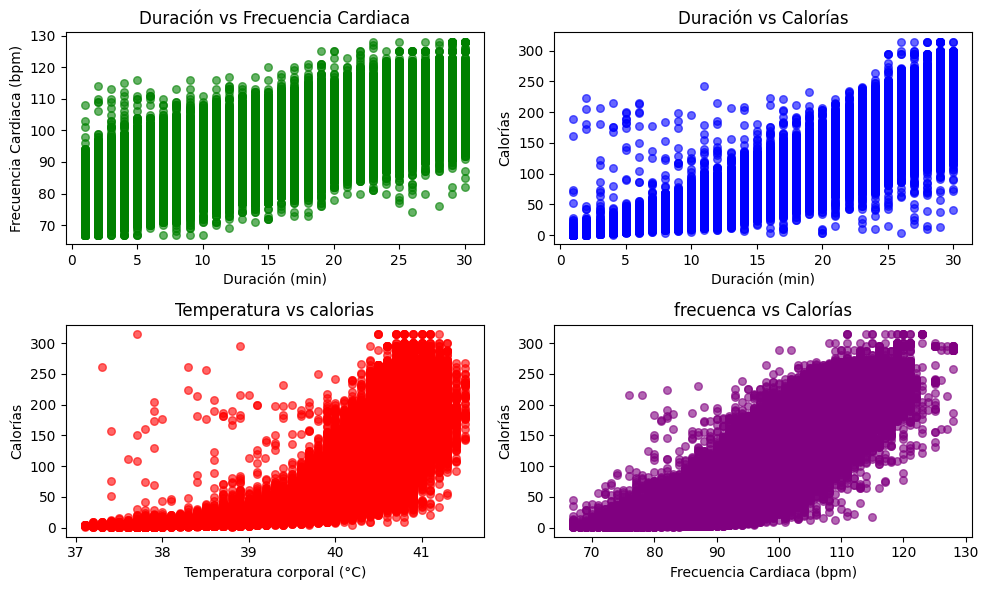

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6)) 

# --- Gráfica 1 ---
axs[0, 0].scatter(df["Duration"], df["Heart_Rate"], s=30, alpha=0.6, color="green")
axs[0, 0].set_xlabel("Duración (min)")
axs[0, 0].set_ylabel("Frecuencia Cardiaca (bpm)")
axs[0, 0].set_title("Duración vs Frecuencia Cardiaca")

# --- Gráfica 2 ---
axs[0, 1].scatter(df["Duration"], df["Calories"], s=30, alpha=0.6, color="blue")
axs[0, 1].set_xlabel("Duración (min)")
axs[0, 1].set_ylabel("Calorías")
axs[0, 1].set_title("Duración vs Calorías")

# --- Gráfica 3 ---
axs[1, 0].scatter(df["Body_Temp"], df["Calories"], s=30, alpha=0.6, color="red")
axs[1, 0].set_xlabel("Temperatura corporal (°C)")
axs[1, 0].set_ylabel("Calorías")
axs[1, 0].set_title("Temperatura vs calorias")

# --- Gráfica 4 ---
axs[1, 1].scatter(df["Heart_Rate"], df["Calories"], s=30, alpha=0.6, color="purple")
axs[1, 1].set_xlabel("Frecuencia Cardiaca (bpm)")
axs[1, 1].set_ylabel("Calorías")
axs[1, 1].set_title("frecuenca vs Calorías")

# Ajustar los espacios entre gráficas
plt.tight_layout()
plt.show()

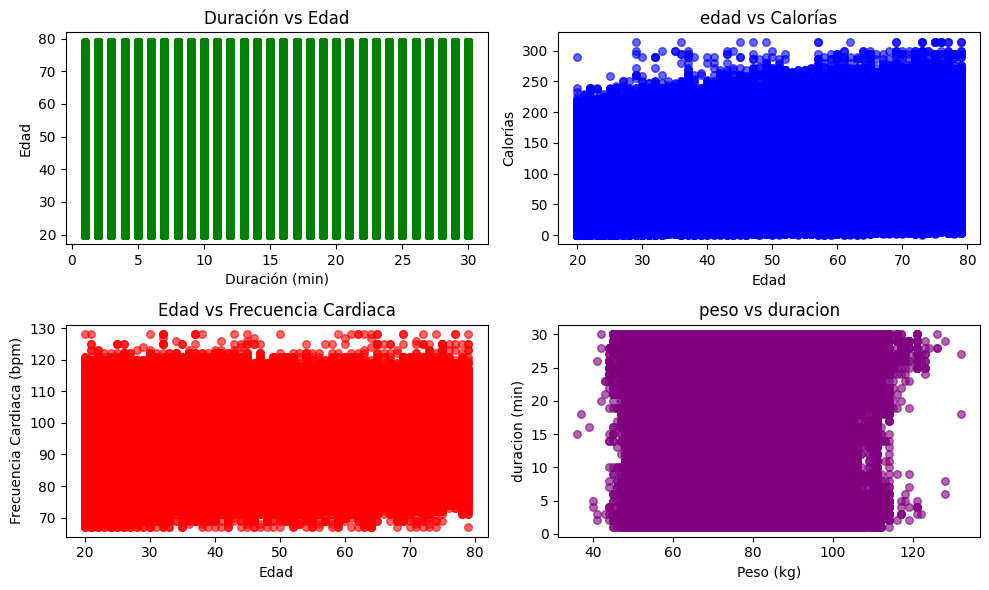

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6)) 

# --- Gráfica 1 ---
axs[0, 0].scatter(df["Duration"], df["Age"], s=30, alpha=0.6, color="green")
axs[0, 0].set_xlabel("Duración (min)")
axs[0, 0].set_ylabel("Edad")
axs[0, 0].set_title("Duración vs Edad")

# --- Gráfica 2 ---
axs[0, 1].scatter(df["Age"], df["Calories"], s=30, alpha=0.6, color="blue")
axs[0, 1].set_xlabel("Edad")
axs[0, 1].set_ylabel("Calorías")
axs[0, 1].set_title("edad vs Calorías")

# --- Gráfica 3 ---
axs[1, 0].scatter(df["Age"], df["Heart_Rate"], s=30, alpha=0.6, color="red")
axs[1, 0].set_xlabel("Edad")
axs[1, 0].set_ylabel("Frecuencia Cardiaca (bpm)")
axs[1, 0].set_title("Edad vs Frecuencia Cardiaca")

# --- Gráfica 4 ---
axs[1, 1].scatter(df["Weight"], df["Duration"], s=30, alpha=0.6, color="purple")
axs[1, 1].set_xlabel("Peso (kg)")
axs[1, 1].set_ylabel("duracion (min)")
axs[1, 1].set_title("peso vs duracion")

# Ajustar los espacios entre gráficas
plt.tight_layout()
plt.show()

Con estos histogramas y graficas podemos hacer un analisis comparativo y de tendencia de todos los datos del dataset y por qué son importantes para nuestros modelos

Para la primera seccion de las graficas comparativas se puede observar caracteristicas que al ser comparadas generar una tendencia clara, de donde podemos suponer que esta relacionadas, mientras que en la segunda seccion a pesar de que se hizo comparaciones donde se suponian que las caracteristicas podian generar ciestas tendencias de una con respecto a otra al hacer las graficas se pudo observar que no era asi, esto se puede deber a la forma en la que se tomaron los datos, como lo es por ejemplo la grafica de Edad vs Duracion, donde se puede notar que tomaron para cada periodo de tiempo la misma cantidad de personas de cada edad, sin embargo eso no le quita importancia a cada caracteristica ya que puede estar relacionas con otras y hasta con el target como se ve en la primera seccion. Por eso para cada caracteristica:

* Edad: * Edad: de este histograma podemos saber que hay variedad de edades en los datos, yendo desde los 20 hasta cerca de los 80, habiendo un pico maximo en las edades mas jovenes la cual va disminuyendo a medida que las edades aumentan, la variabilidad de datos nos ayuda en los modelos para tener en cuenta la variabilidad que puede haber en la actividad fisica en cada etapa de vida, sin embargo si hizo la comparacion de la edad vs las calorais quemadas y al parecer no es una caracteristica clave para predecir cuantas calorias puede quemar una persona, para esto hay que tener en cuenta las demas caracteristicas de la base de datos, por eso cada una es importante y apotan de manera diferente.

* Altura y peso: dos factores que van de la mano, ya que juntos nos permiten calcular el IMC y asi saber cuando una persona tiene sobre peso o bajo peso, lo que tambien puede afectar en la cantidad de calorias que pueda quemar o la cantidad de tiempo que pueda aguantar, incluso en la frecuencia cardiaca. asi que tambien es importante para el entrenamiento que el modelo tenga en cuenta estas caracteristicas fisicas, en las graficas se ha hecho una de peso y altura, junto con el imc y para la base de datos se puede ver que anque hay variedad de IMC, no hay muchos datos a los extremos (sobre peso y bajo peso), por lo que se peude deducir que las personas utilizadas para el estudio tenian un indice de masa corporal dentro de los parametros normales. Incluso en los histogramas se puede evidencia la tendencia que tienen ambos datos es muy parecida, concordando con la grafica de peso vs estatura.

* Duracion: En el histograma de duracion podemos observar que hay un gran balance entre los diferentes tiempos de 0 a 30 minutos, siendo los tiempos extremos los que menos muestras contiene la base de datos, en la investigacion sobre la toma y el protocolo de datos no se encontró alguna aclaracion de si la duracion de la actividad fisica fue controlada o asignada con base en diferentes aspectos, pero si se puede notar el balance y en la grafica de edad vs duracion se puede confirmar que se tomaron los mismos periodos de tiempo para las diferentes edades, sin embargo cuando se hace la comparacion con otros aspectos se puede ver que la duracion es una caracteristica muy importante que bien afecta tanto al objetivo como a otras caracteristicas como el caso de la frecuencia cardiaca, donde es claro que a medida de que aumenta el tiempo de actividad fisica tambien lo hace la frecuencia cardiaca y tiene sentido si se analiza desde la fisiologia a ma esfuerzo fisico mas esfuerzo cardiaco.

* Frecuencia cardiaca: esta característica es fundamental, ya que refleja directamente la intensidad del ejercicio y la respuesta fisiológica del cuerpo. En las gráficas comparativas se observa cómo puede variar de persona a persona, dependiendo de factores como edad, condición física o incluso el sexo. Al relacionarse con la duración de la actividad fisica, se vuelve una de las variables clave para el modelo, ya que puede servir como indicador del gasto energético y del esfuerzo realizado.

* Temperatira corporal: aunque pueda parecer un dato secundario, al hacer las graficas se peude observar como la temperatura corporal también aporta información valiosa, pues un aumento de esta suele estar relacionado con el nivel de esfuerzo físico y el gasto calórico. En los datos se observa una tendencia importante pues a mayor temperatura mayor fue el numero de calorias quemadas en las muestras. Para el modelo, este parámetro puede complementar las predicciones sobre el rendimiento y el gasto calórico, ya que se asocia a los cambios metabólicos durante el ejercicio.

* Sexo:al contar con datos de hombres y mujeres, se puede analizar cómo influyen las diferencias fisiológicas entre ambos en la actividad física. La gráfica de barras muestra un balance razonable en la cantidad de datos por cada grupo, lo que permite que el modelo no tenga sesgo fuerte hacia uno de los dos. Esta variable es importante porque puede haber diferencias en frecuencia cardiaca, resistencia o quema de calorías según el sexo.

* Calorias: esta es la variable objetivo y, por lo tanto, la más relevante para el análisis. Todas las demás características aportan de una u otra forma a predecir cuántas calorías puede quemar una persona durante el ejercicio. En las gráficas comparativas se observa que la quema de calorías está directamente relacionada con factores como la duración y la frecuencia cardiaca, mientras que otras variables aportan contexto adicional (como edad, peso o sexo). Es clave porque resume el efecto total del ejercicio en el organismo y constituye la base para entrenar un modelo predictivo.



# Procesamiento de los datos

In [9]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # se hace el mapeo de las variables categoricas a numericas
df['Sex'] = pd.to_numeric(df['Sex'], errors='coerce') #se fuerza el cambio a numerico 
print(df['Sex'].dtype)
df.info()
display(df)

int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  int64  
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 45.8 MB


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,1,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0


In [11]:
print(df['Sex'].unique())
print(df['Sex'].isna().sum())
df

[0 1]
0


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,1,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0


In [12]:
#particion de los datos en 70/15/15 para entrenamiento, validacion y prueba

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['Calories']), df["Calories"], test_size=0.3, random_state=11
)
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, test_size=0.5, random_state=11
)

x_val

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
430027,1,75,158.0,62.0,11.0,92.0,39.7
46110,0,44,203.0,104.0,3.0,91.0,38.8
276496,1,51,169.0,66.0,11.0,89.0,40.1
192984,0,48,186.0,80.0,17.0,92.0,40.0
687313,0,68,196.0,102.0,23.0,102.0,40.9
...,...,...,...,...,...,...,...
400513,1,79,153.0,55.0,19.0,103.0,40.7
164746,0,47,191.0,91.0,29.0,108.0,40.9
621497,0,24,183.0,84.0,13.0,94.0,39.9
749741,0,26,171.0,72.0,18.0,96.0,40.3


In [ ]:
num_cols = x_train.select_dtypes(include=np.number).columns

num_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())] #Pipeline que normaliza los datos numericos entre 0 y 1
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols), #aplicar pipeline a las columnas numericas
    ]
)


In [14]:
from sklearn import set_config #para ver el diagrama del pipeline
set_config(display="diagram")

preprocessor

,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


# Entrenamiento de modelos

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score

from sklearn.decomposition import PCA
from tensorflow import keras

## Modelo k-Nearest Neighbors (kNN)

In [16]:

n_neighbors = range(1, 51, 3)

results = []

for k in n_neighbors:
  pipe_knn = Pipeline(steps=[("preprocessor", preprocessor), ("regresor", KNeighborsRegressor(n_neighbors=k))])

  pipe_knn.fit(x_train, y_train)
  y_pred = pipe_knn.predict(x_val)

  r2 = r2_score(y_val, y_pred)
  results.append((k, r2))

pipe_knn

,steps,"[('preprocessor', ...), ('regresor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


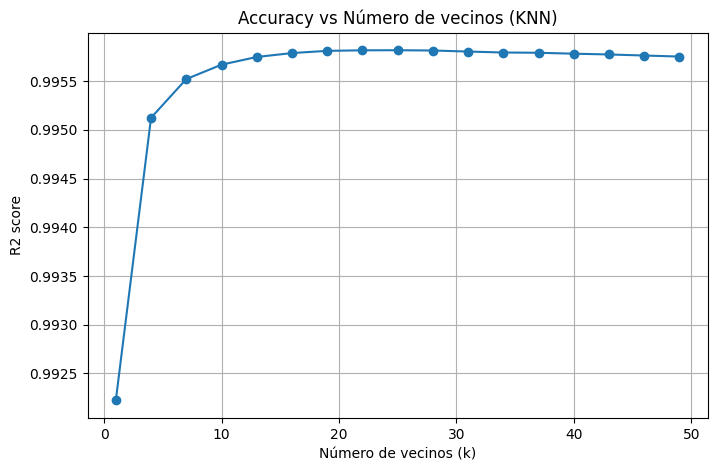

Mejor k = 25 con accuracy = 0.9958


In [17]:
k_list, r2_list = zip(*results)

# Graficar accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_list, r2_list, marker="o")
plt.title("Accuracy vs Número de vecinos (KNN)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("R2 score")
plt.grid(True)
plt.show()

# Mejor k
best_k, best_r2 = max(results, key=lambda x: x[1])
print(f"Mejor k = {best_k} con accuracy = {best_r2:.4f}")

In [18]:
x_train_full = pd.concat([x_train, x_val])
y_train_full = np.hstack([y_train, y_val])

pipe_knn = Pipeline(steps=[("preprocessor", preprocessor), ("regresor", KNeighborsRegressor(n_neighbors=best_k))])
pipe_knn.fit(x_train_full, y_train_full)

# Evaluar en test
knn_acc = pipe_knn.score(x_test, y_test)
print(f"Accuracy en el conjunto de prueba: {knn_acc:0.4f}")

Accuracy en el conjunto de prueba: 0.9959


In [19]:
knn_pred_test=pd.DataFrame(pipe_knn.predict(x_test).flatten(), columns=['KNN_Predicted_test']).reset_index(drop=True)
knn_pred_train=pd.DataFrame(pipe_knn.predict(x_train).flatten(), columns=['KNN_Predicted_train']).reset_index(drop=True)
knn_pred_val=pd.DataFrame(pipe_knn.predict(x_val).flatten(), columns=['KNN_Predicted_val']).reset_index(drop=True)

In [20]:

knn_train= pd.concat([
    pd.DataFrame(x_train).reset_index(drop=True),
    pd.DataFrame(y_train).reset_index(drop=True),
    knn_pred_train
], axis=1)

knn_val=pd.concat([
    pd.DataFrame(x_val).reset_index(drop=True),
    pd.DataFrame(y_val).reset_index(drop=True),
    knn_pred_val
], axis=1)

knn_test=pd.concat([
    pd.DataFrame(x_test).reset_index(drop=True),
    pd.DataFrame(y_test).reset_index(drop=True),
    knn_pred_test
], axis=1)


print("Cuadro comnparativo de resultados de train de KNN")
display(knn_train)
print("Cuadro comnparativo de resultados de validacion de KNN")
display(knn_val)
print("Cuadro comnparativo de resultados de test de KNN")
display(knn_test)

Cuadro comnparativo de resultados de train de KNN


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,KNN_Predicted_train
0,1,25,156.0,54.0,3.0,92.0,38.7,14.0,14.36
1,0,54,186.0,92.0,5.0,84.0,39.1,20.0,20.20
2,0,45,182.0,86.0,6.0,91.0,39.3,27.0,27.28
3,1,54,168.0,65.0,4.0,82.0,38.8,16.0,14.88
4,1,73,181.0,77.0,2.0,81.0,38.3,9.0,8.84
...,...,...,...,...,...,...,...,...,...
524995,1,22,163.0,59.0,2.0,86.0,38.0,8.0,7.08
524996,1,38,175.0,73.0,23.0,103.0,40.7,136.0,134.44
524997,0,22,192.0,98.0,27.0,104.0,40.9,155.0,151.28
524998,1,33,168.0,61.0,5.0,85.0,39.1,19.0,19.24


Cuadro comnparativo de resultados de validacion de KNN


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,KNN_Predicted_val
0,1,75,158.0,62.0,11.0,92.0,39.7,60.0,57.52
1,0,44,203.0,104.0,3.0,91.0,38.8,15.0,14.60
2,1,51,169.0,66.0,11.0,89.0,40.1,50.0,52.08
3,0,48,186.0,80.0,17.0,92.0,40.0,81.0,80.12
4,0,68,196.0,102.0,23.0,102.0,40.9,184.0,179.52
...,...,...,...,...,...,...,...,...,...
112495,1,79,153.0,55.0,19.0,103.0,40.7,129.0,136.80
112496,0,47,191.0,91.0,29.0,108.0,40.9,238.0,214.00
112497,0,24,183.0,84.0,13.0,94.0,39.9,52.0,50.24
112498,0,26,171.0,72.0,18.0,96.0,40.3,72.0,77.16


Cuadro comnparativo de resultados de test de KNN


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,KNN_Predicted_test
0,0,79,196.0,101.0,27.0,112.0,40.8,252.0,250.80
1,0,41,192.0,92.0,26.0,106.0,40.9,169.0,174.88
2,0,65,187.0,87.0,9.0,82.0,39.6,39.0,37.88
3,0,27,197.0,96.0,13.0,94.0,40.1,56.0,57.52
4,0,42,191.0,87.0,26.0,115.0,40.4,208.0,207.76
...,...,...,...,...,...,...,...,...,...
112495,1,64,158.0,60.0,5.0,85.0,39.1,23.0,22.68
112496,0,48,199.0,102.0,14.0,98.0,40.0,84.0,82.88
112497,0,32,185.0,85.0,22.0,94.0,40.5,104.0,97.48
112498,0,23,189.0,95.0,15.0,97.0,39.7,68.0,65.96


## Modelo de ensamble: Random Forest

In [21]:

rf_base = RandomForestRegressor(random_state=1)

param_grid = {
    'regresor__n_estimators': [50, 100],
    'regresor__max_depth': list(range(2, 5)),
    'regresor__min_samples_leaf': [1, 10, 50]
}

pipeline_rf = Pipeline(steps = [
    ('processor', preprocessor),
    ('regresor', rf_base),
    ])

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, cv=3, param_grid=param_grid)


In [23]:
rf.fit(x_train, y_train)

rf.best_params_


{'regresor__max_depth': 4,
 'regresor__min_samples_leaf': 1,
 'regresor__n_estimators': 50}

In [25]:
pipeline_rf

,steps,"[('processor', ...), ('regresor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
y_pred_train = rf.predict(x_train_full)

print("Conjunto de entrenamiento")
print(f'R2 Score: {r2_score(y_train_full, y_pred_train)}')
print(f"Mean Absolute Error: {mean_absolute_error(y_train_full, y_pred_train)}")

Conjunto de entrenamiento
R2 Score: 0.9525425108470726
Mean Absolute Error: 9.52167625572063


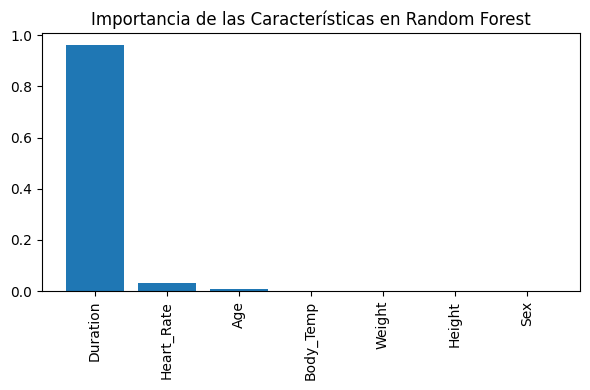

In [27]:
best_pipeline = rf.best_estimator_

rf_model = best_pipeline.named_steps['regresor']

importances = rf_model.feature_importances_

feature_names = x_train.columns.tolist()
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(6, 4))
plt.title("Importancia de las Características en Random Forest")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [28]:
rf_pred_test=pd.DataFrame(rf.predict(x_test).flatten(), columns=['RF_Predicted_test']).reset_index(drop=True)
rf_pred_train=pd.DataFrame(rf.predict(x_train).flatten(), columns=['RF_Predicted_train']).reset_index(drop=True)
rf_pred_val=pd.DataFrame(rf.predict(x_val).flatten(), columns=['RF_Predicted_val']).reset_index(drop=True)


In [29]:

rf_train= pd.concat([
    pd.DataFrame(x_train).reset_index(drop=True),
    pd.DataFrame(y_train).reset_index(drop=True),
    rf_pred_train
], axis=1)

rf_val=pd.concat([
    pd.DataFrame(x_val).reset_index(drop=True),
    pd.DataFrame(y_val).reset_index(drop=True),
    rf_pred_val
], axis=1)

rf_test=pd.concat([
    pd.DataFrame(x_test).reset_index(drop=True),
    pd.DataFrame(y_test).reset_index(drop=True),
    rf_pred_test
], axis=1)

print("Cuadro comnparativo de resultados de train de Random Forest")
display(rf_train)
print("Cuadro comnparativo de resultados de validacion de Random Forest")
display(rf_val)
print("Cuadro comnparativo de resultados de test de Random Forest")
display(rf_test)


Cuadro comnparativo de resultados de train de Random Forest


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,RF_Predicted_train
0,1,25,156.0,54.0,3.0,92.0,38.7,14.0,8.957410
1,0,54,186.0,92.0,5.0,84.0,39.1,20.0,20.455090
2,0,45,182.0,86.0,6.0,91.0,39.3,27.0,20.640378
3,1,54,168.0,65.0,4.0,82.0,38.8,16.0,13.461243
4,1,73,181.0,77.0,2.0,81.0,38.3,9.0,8.957410
...,...,...,...,...,...,...,...,...,...
524995,1,22,163.0,59.0,2.0,86.0,38.0,8.0,8.957410
524996,1,38,175.0,73.0,23.0,103.0,40.7,136.0,154.166215
524997,0,22,192.0,98.0,27.0,104.0,40.9,155.0,158.915436
524998,1,33,168.0,61.0,5.0,85.0,39.1,19.0,20.455090


Cuadro comnparativo de resultados de validacion de Random Forest


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,RF_Predicted_val
0,1,75,158.0,62.0,11.0,92.0,39.7,60.0,54.008957
1,0,44,203.0,104.0,3.0,91.0,38.8,15.0,8.957410
2,1,51,169.0,66.0,11.0,89.0,40.1,50.0,54.008957
3,0,48,186.0,80.0,17.0,92.0,40.0,81.0,76.894328
4,0,68,196.0,102.0,23.0,102.0,40.9,184.0,127.036486
...,...,...,...,...,...,...,...,...,...
112495,1,79,153.0,55.0,19.0,103.0,40.7,129.0,131.560426
112496,0,47,191.0,91.0,29.0,108.0,40.9,238.0,192.551173
112497,0,24,183.0,84.0,13.0,94.0,39.9,52.0,66.915845
112498,0,26,171.0,72.0,18.0,96.0,40.3,72.0,77.423037


Cuadro comnparativo de resultados de test de Random Forest


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,RF_Predicted_test
0,0,79,196.0,101.0,27.0,112.0,40.8,252.0,219.650346
1,0,41,192.0,92.0,26.0,106.0,40.9,169.0,158.915436
2,0,65,187.0,87.0,9.0,82.0,39.6,39.0,41.972847
3,0,27,197.0,96.0,13.0,94.0,40.1,56.0,66.915845
4,0,42,191.0,87.0,26.0,115.0,40.4,208.0,191.466271
...,...,...,...,...,...,...,...,...,...
112495,1,64,158.0,60.0,5.0,85.0,39.1,23.0,20.455090
112496,0,48,199.0,102.0,14.0,98.0,40.0,84.0,67.494075
112497,0,32,185.0,85.0,22.0,94.0,40.5,104.0,126.624623
112498,0,23,189.0,95.0,15.0,97.0,39.7,68.0,95.142042


## Modelo DNN

In [30]:
model_dnn = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(7,)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.L2(1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.L2(1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation=None)
])

model_dnn.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

C:\Users\sarao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 42 (168.00 B)

In [32]:
model_dnn.fit(
    x_train, y_train,
    epochs=200,
    batch_size=512,
    validation_data=(x_val, y_val),
    validation_batch_size=len(x_val)
)

Epoch 1/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 85.4293 - mean_absolute_error: 83.3800 - val_loss: 74.5788 - val_mean_absolute_error: 74.5089
Epoch 2/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 61.6165 - mean_absolute_error: 61.5979 - val_loss: 42.7351 - val_mean_absolute_error: 42.7174
Epoch 3/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 29.2124 - mean_absolute_error: 29.1717 - val_loss: 13.0669 - val_mean_absolute_error: 13.0031
Epoch 4/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6016 - mean_absolute_error: 7.5318 - val_loss: 6.0969 - val_mean_absolute_error: 6.0246
Epoch 5/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9845 - mean_absolute_error: 3.9112 - val_loss: 3.1575 - val_mean_absolute_error: 3.0878
Epoch 6/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7705 - mean_absolute_error: 3.7023 - val_loss: 3.0960 - val_mean_absolute_error: 3.0303
Epoch 7/200
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7846 

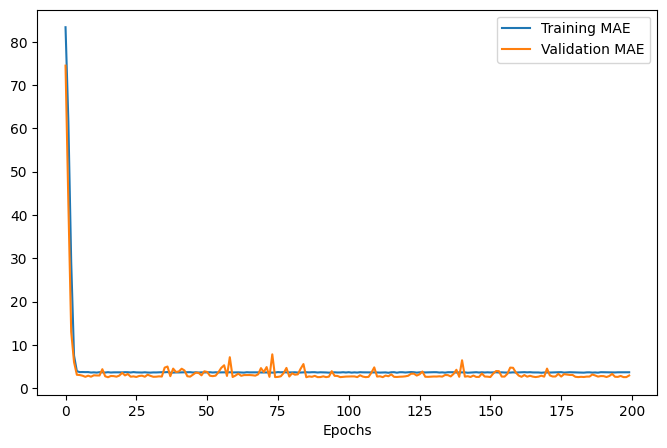

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(model_dnn.history.history['mean_absolute_error'], label='Training MAE')
ax.plot(model_dnn.history.history['val_mean_absolute_error'], label='Validation MAE')
ax.set_xlabel('Epochs')
ax.legend()

In [34]:
dnn_pred_test=pd.DataFrame(model_dnn.predict(x_test).flatten(), columns=['DNN_Predicted_test']).reset_index(drop=True)
dnn_pred_train=pd.DataFrame(model_dnn.predict(x_train).flatten(), columns=['DNN_Predicted_train']).reset_index(drop=True)
dnn_pred_val=pd.DataFrame(model_dnn.predict(x_val).flatten(), columns=['DNN_Predicted_val']).reset_index(drop=True)

3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2s 566us/step
16407/16407 ━━━━━━━━━━━━━━━━━━━━ 9s 541us/step
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step


In [35]:

dnn_train= pd.concat([
    pd.DataFrame(x_train).reset_index(drop=True),
    pd.DataFrame(y_train).reset_index(drop=True),
    dnn_pred_train
], axis=1)

dnn_val=pd.concat([
    pd.DataFrame(x_val).reset_index(drop=True),
    pd.DataFrame(y_val).reset_index(drop=True),
    dnn_pred_val
], axis=1)

dnn_test=pd.concat([
    pd.DataFrame(x_test).reset_index(drop=True),
    pd.DataFrame(y_test).reset_index(drop=True),
    dnn_pred_test
], axis=1)

print("Cuadro comnparativo de resultados de train de DNN")
display(dnn_train)
print("Cuadro comnparativo de resultados de validacion de DNN")
display(dnn_val)
print("Cuadro comnparativo de resultados de test de DNN")
display(dnn_test)

Cuadro comnparativo de resultados de train de DNN


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,DNN_Predicted_train
0,1,25,156.0,54.0,3.0,92.0,38.7,14.0,16.648876
1,0,54,186.0,92.0,5.0,84.0,39.1,20.0,20.969276
2,0,45,182.0,86.0,6.0,91.0,39.3,27.0,27.553770
3,1,54,168.0,65.0,4.0,82.0,38.8,16.0,15.950144
4,1,73,181.0,77.0,2.0,81.0,38.3,9.0,7.489989
...,...,...,...,...,...,...,...,...,...
524995,1,22,163.0,59.0,2.0,86.0,38.0,8.0,7.757079
524996,1,38,175.0,73.0,23.0,103.0,40.7,136.0,136.832855
524997,0,22,192.0,98.0,27.0,104.0,40.9,155.0,158.523102
524998,1,33,168.0,61.0,5.0,85.0,39.1,19.0,20.642010


Cuadro comnparativo de resultados de validacion de DNN


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,DNN_Predicted_val
0,1,75,158.0,62.0,11.0,92.0,39.7,60.0,57.299644
1,0,44,203.0,104.0,3.0,91.0,38.8,15.0,18.153221
2,1,51,169.0,66.0,11.0,89.0,40.1,50.0,49.834114
3,0,48,186.0,80.0,17.0,92.0,40.0,81.0,82.991272
4,0,68,196.0,102.0,23.0,102.0,40.9,184.0,181.706650
...,...,...,...,...,...,...,...,...,...
112495,1,79,153.0,55.0,19.0,103.0,40.7,129.0,131.526276
112496,0,47,191.0,91.0,29.0,108.0,40.9,238.0,215.337555
112497,0,24,183.0,84.0,13.0,94.0,39.9,52.0,52.152214
112498,0,26,171.0,72.0,18.0,96.0,40.3,72.0,75.475952


Cuadro comnparativo de resultados de test de DNN


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,DNN_Predicted_test
0,0,79,196.0,101.0,27.0,112.0,40.8,252.0,258.134125
1,0,41,192.0,92.0,26.0,106.0,40.9,169.0,180.089874
2,0,65,187.0,87.0,9.0,82.0,39.6,39.0,36.103836
3,0,27,197.0,96.0,13.0,94.0,40.1,56.0,58.287254
4,0,42,191.0,87.0,26.0,115.0,40.4,208.0,214.113327
...,...,...,...,...,...,...,...,...,...
112495,1,64,158.0,60.0,5.0,85.0,39.1,23.0,23.022736
112496,0,48,199.0,102.0,14.0,98.0,40.0,84.0,85.267601
112497,0,32,185.0,85.0,22.0,94.0,40.5,104.0,101.092896
112498,0,23,189.0,95.0,15.0,97.0,39.7,68.0,70.689812


# Comparacion de los modelos

Mejor modelo según R2 Score: KNN con R2 = 0.9959
Mejor modelo según Mean Absolute Error: KNN con MAE = 2.4303


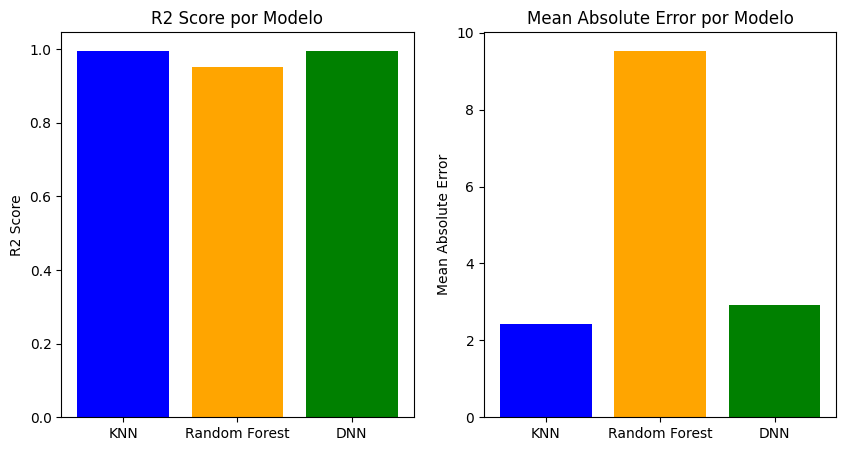

In [36]:
r2_knn = r2_score(y_test, knn_pred_test)
r2_rf = r2_score(y_test, rf_pred_test)
r2_dnn = r2_score(y_test, dnn_pred_test)   

mae_knn = mean_absolute_error(y_test, knn_pred_test)
mae_rf = mean_absolute_error(y_test, rf_pred_test)
mae_dnn = mean_absolute_error(y_test, dnn_pred_test)


modelos = ['KNN', 'Random Forest', 'DNN']
r2_scores = [r2_knn, r2_rf, r2_dnn]
mae_scores = [mae_knn, mae_rf, mae_dnn]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(modelos, r2_scores, color=['blue', 'orange', 'green'])
plt.title('R2 Score por Modelo')
plt.ylabel('R2 Score')

plt.subplot(1, 2, 2)
plt.bar(modelos, mae_scores, color=['blue', 'orange', 'green'])
plt.title('Mean Absolute Error por Modelo')
plt.ylabel('Mean Absolute Error')

best_r2_index = np.argmax(r2_scores)
best_mae_index = np.argmin(mae_scores)
print(f'Mejor modelo según R2 Score: {modelos[best_r2_index]} con R2 = {r2_scores[best_r2_index]:.4f}')
print(f'Mejor modelo según Mean Absolute Error: {modelos[best_mae_index]} con MAE = {mae_scores[best_mae_index]:.4f}')


In [37]:
print("Cuadro comparativo de resultados de train de los 3 modelos")
display(pd.concat([
    pd.DataFrame(x_train).reset_index(drop=True),
    pd.DataFrame(y_train).reset_index(drop=True),
    knn_pred_train, rf_pred_train, dnn_pred_train], axis=1))

print("Cuadro comparativo de resultados de validacion de los 3 modelos")
display(pd.concat([
    pd.DataFrame(x_val).reset_index(drop=True),
    pd.DataFrame(y_val).reset_index(drop=True),
    knn_pred_val, rf_pred_val, dnn_pred_val], axis=1))

print("Cuadro comparativo de resultados de test de los 3 modelos")
display(pd.concat([
    pd.DataFrame(x_test).reset_index(drop=True),
    pd.DataFrame(y_test).reset_index(drop=True),
    knn_pred_test, rf_pred_test, dnn_pred_test], axis=1))

plt.tight_layout()
plt.show()

Cuadro comparativo de resultados de train de los 3 modelos


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,KNN_Predicted_train,RF_Predicted_train,DNN_Predicted_train
0,1,25,156.0,54.0,3.0,92.0,38.7,14.0,14.36,8.957410,16.648876
1,0,54,186.0,92.0,5.0,84.0,39.1,20.0,20.20,20.455090,20.969276
2,0,45,182.0,86.0,6.0,91.0,39.3,27.0,27.28,20.640378,27.553770
3,1,54,168.0,65.0,4.0,82.0,38.8,16.0,14.88,13.461243,15.950144
4,1,73,181.0,77.0,2.0,81.0,38.3,9.0,8.84,8.957410,7.489989
...,...,...,...,...,...,...,...,...,...,...,...
524995,1,22,163.0,59.0,2.0,86.0,38.0,8.0,7.08,8.957410,7.757079
524996,1,38,175.0,73.0,23.0,103.0,40.7,136.0,134.44,154.166215,136.832855
524997,0,22,192.0,98.0,27.0,104.0,40.9,155.0,151.28,158.915436,158.523102
524998,1,33,168.0,61.0,5.0,85.0,39.1,19.0,19.24,20.455090,20.642010


Cuadro comparativo de resultados de validacion de los 3 modelos


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,KNN_Predicted_val,RF_Predicted_val,DNN_Predicted_val
0,1,75,158.0,62.0,11.0,92.0,39.7,60.0,57.52,54.008957,57.299644
1,0,44,203.0,104.0,3.0,91.0,38.8,15.0,14.60,8.957410,18.153221
2,1,51,169.0,66.0,11.0,89.0,40.1,50.0,52.08,54.008957,49.834114
3,0,48,186.0,80.0,17.0,92.0,40.0,81.0,80.12,76.894328,82.991272
4,0,68,196.0,102.0,23.0,102.0,40.9,184.0,179.52,127.036486,181.706650
...,...,...,...,...,...,...,...,...,...,...,...
112495,1,79,153.0,55.0,19.0,103.0,40.7,129.0,136.80,131.560426,131.526276
112496,0,47,191.0,91.0,29.0,108.0,40.9,238.0,214.00,192.551173,215.337555
112497,0,24,183.0,84.0,13.0,94.0,39.9,52.0,50.24,66.915845,52.152214
112498,0,26,171.0,72.0,18.0,96.0,40.3,72.0,77.16,77.423037,75.475952


Cuadro comparativo de resultados de test de los 3 modelos


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,KNN_Predicted_test,RF_Predicted_test,DNN_Predicted_test
0,0,79,196.0,101.0,27.0,112.0,40.8,252.0,250.80,219.650346,258.134125
1,0,41,192.0,92.0,26.0,106.0,40.9,169.0,174.88,158.915436,180.089874
2,0,65,187.0,87.0,9.0,82.0,39.6,39.0,37.88,41.972847,36.103836
3,0,27,197.0,96.0,13.0,94.0,40.1,56.0,57.52,66.915845,58.287254
4,0,42,191.0,87.0,26.0,115.0,40.4,208.0,207.76,191.466271,214.113327
...,...,...,...,...,...,...,...,...,...,...,...
112495,1,64,158.0,60.0,5.0,85.0,39.1,23.0,22.68,20.455090,23.022736
112496,0,48,199.0,102.0,14.0,98.0,40.0,84.0,82.88,67.494075,85.267601
112497,0,32,185.0,85.0,22.0,94.0,40.5,104.0,97.48,126.624623,101.092896
112498,0,23,189.0,95.0,15.0,97.0,39.7,68.0,65.96,95.142042,70.689812


<Figure size 640x480 with 0 Axes>

### Prueba con muestra artificial

In [38]:
num_filas = 20

new_data= {
    'Age': np.random.randint(low=18, high=60, size=num_filas),
    'Height': np.random.randint(low=150, high=200, size=num_filas),
    'Weight': np.random.randint(low=50, high=100, size=num_filas),
    'Duration': np.random.randint(low=1, high=30, size=num_filas),
    'Heart_Rate': np.random.randint(low=60, high=130, size=num_filas),
    'Body_Temp': 36.5 + np.random.rand(num_filas) * 2.5,
    'Sex': np.random.choice([1,0], size=num_filas)
}

new_data_df = pd.DataFrame(new_data)
display(new_data_df)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex
0,38,198,85,6,111,38.703094,1
1,37,189,65,7,80,38.559555,1
2,50,163,87,17,68,38.127495,1
3,31,176,92,27,111,38.040938,0
4,57,195,69,25,127,38.662059,0
5,52,170,68,25,61,36.844153,0
6,44,197,59,15,101,38.784158,1
7,53,168,79,2,73,36.556817,1
8,35,196,78,10,75,38.178773,1
9,30,158,88,14,85,37.501761,1


In [39]:
knn_new_pred = pipe_knn.predict(new_data_df)

pd.concat([
    pd.DataFrame(new_data_df).reset_index(drop=True),
    pd.DataFrame(knn_new_pred, columns=['KNN_New_Predicted']).reset_index(drop=True)
], axis=1)


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex,KNN_New_Predicted
0,38,198,85,6,111,38.703094,1,34.32
1,37,189,65,7,80,38.559555,1,15.92
2,50,163,87,17,68,38.127495,1,34.00
3,31,176,92,27,111,38.040938,0,160.84
4,57,195,69,25,127,38.662059,0,215.68
5,52,170,68,25,61,36.844153,0,31.64
6,44,197,59,15,101,38.784158,1,69.80
7,53,168,79,2,73,36.556817,1,3.60
8,35,196,78,10,75,38.178773,1,15.28
9,30,158,88,14,85,37.501761,1,27.40


In [40]:
# en la base de datos de test que venia de keggle no se tiene la columna target (calories) 
# por lo que no se puede evaluar el modelo en este conjunto de datos, pero si se puede hacer 
# la prediccion con los datos nuevos y ver como se comporta el modelo con estos datos nuevos

df_test= pd.read_csv('test.csv')
df_test.drop(columns=['id'], inplace=True)

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1}) 
df_test['Sex'] = pd.to_numeric(df['Sex'], errors='coerce')
print(df_test['Sex'].dtype)
df_test.info()
display(df_test)

int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         250000 non-null  int64  
 1   Age         250000 non-null  int64  
 2   Height      250000 non-null  float64
 3   Weight      250000 non-null  float64
 4   Duration    250000 non-null  float64
 5   Heart_Rate  250000 non-null  float64
 6   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 13.4 MB


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,45,177.0,81.0,7.0,87.0,39.8
1,1,26,200.0,97.0,20.0,101.0,40.5
2,1,29,188.0,85.0,16.0,102.0,40.4
3,0,39,172.0,73.0,20.0,107.0,40.6
4,1,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...
249995,1,56,159.0,62.0,6.0,85.0,39.4
249996,0,32,202.0,101.0,3.0,84.0,38.4
249997,1,31,164.0,64.0,14.0,98.0,40.1
249998,0,62,158.0,61.0,25.0,106.0,40.7


In [41]:
knn_test_new_pred = pipe_knn.predict(df_test)

In [42]:
new_pred=pd.concat([
    pd.DataFrame(df_test).reset_index(drop=True),
    pd.DataFrame(knn_test_new_pred, columns=['KNN_Test_New_Predicted']).reset_index(drop=True)
], axis=1) 
display(new_pred.head(30))

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,KNN_Test_New_Predicted
0,0,45,177.0,81.0,7.0,87.0,39.8,28.52
1,1,26,200.0,97.0,20.0,101.0,40.5,99.52
2,1,29,188.0,85.0,16.0,102.0,40.4,87.88
3,0,39,172.0,73.0,20.0,107.0,40.6,127.64
4,1,30,173.0,67.0,16.0,94.0,40.5,77.16
5,1,43,169.0,65.0,6.0,81.0,39.4,21.92
6,1,74,189.0,97.0,9.0,86.0,40.0,46.00
7,0,60,186.0,90.0,2.0,79.0,38.1,6.80
8,1,21,196.0,91.0,4.0,84.0,38.7,13.96
9,0,32,189.0,89.0,29.0,111.0,40.8,204.68
